## Analyze A/B Test Results

This project will assure me that I have firmly grasped the statistical concepts that I have learned when analyzing A/b test results. Upon successful completion, this project will serve as a great templet to use when analyzing future datasets involving A/B testing results or other such datasets that will involve using similar statistical methods as demonstrated throughout this project. The goal is to have this project serve as a reference point when getting stuck on future projects.

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, the libraries used in this project will be imported.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df= pd.read_csv("C:\\Users\\teamd\\Udacity Project 3\\ab_data.csv") # Reading in the dataset
df.head(10) # Sometimes it can be helpful to see more than just the first 5 rows

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


Upon observing the first 10 rows of this dataset, it does appear we are working with an experiment that involves a control group and a treatment group. The control group being the participants who are landing on the old page, and the experimental group being participants who are landing on the new page. 

b. Use the below cell to find the number of rows in the dataset.

In [3]:
# Various methods can be used to find the number of rows in a dataset
# df.info() method will give more helpful information rather than just using the 'df.shape' method
df.info()
df.shape # Returns a tuple with the number of rows being the first digit, and the second digit being the number of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


(294478, 5)

* The dataset consists of 294,478 rows and 5 columns. 
* The 'user_id' and 'converted' columns are integer data types.
* The remaining columns are of the object data type. Typically, an object data type refers to a string data type.
* There do not appear to be any missing values.

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
# Assigning those who converted to the 'yes_convert' variable
# Assigning those who did not convert to the 'no_convert' variable
yes_convert = df.query('converted == 1').shape[0]
no_convert = df.query('converted == 0').shape[0]
print(yes_convert)
print(no_convert)
proportion = yes_convert/df.shape[0] # Dividing the number who converted by the total number of rows in the dataset.
print(proportion * 100) # Determining the percentage of users who converted

35237
259241
11.96591935560551


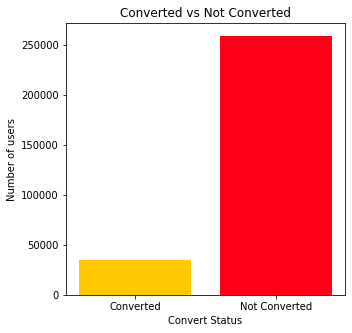

In [6]:
# Creating a bar graph to visually represent the small number of users who converted
plt.figure(figsize=(5,5))
locations = [1,2]
heights = np.array([35237, 259241])
convert_status_labels = ['Converted', 'Not Converted']
colors = cm.hsv(heights/ float(max(heights)))
plt.bar(locations, heights, tick_label=convert_status_labels, color = colors);
plt.title('Converted vs Not Converted')
plt.xlabel('Convert Status')
plt.ylabel('Number of users');

* The bar chart visually demonstrates the small number of users who converted, roughly 12%. 
* This result included the calculation of all users, not just unique users.
* This does not consider where the new_page and treatment may not line up.
* The takeway thus far is that it looks like most users are not conveerting. 


e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
df[((df.group == 'control') != (df.landing_page == 'old_page'))].shape[0]

3893

In [8]:
df[((df.group == 'treatment') != (df.landing_page == 'new_page'))].shape[0]

3893

Determing the number of times the new_page and treatment do not line up from both ends yields a row count of 3,893.

f. Do any of the rows have missing values?

As stated above by using the df.info() method, there are no rows with missing values.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

The rows in which the control or experiement group do not correctly line up with their respective landing page will be dropped.

In [9]:
df2 = df.drop(df[((df.group == 'treatment') != (df.landing_page == 'new_page'))].index) 

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
duplicates = df2[df2.duplicated(['user_id'])]
duplicates

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

Row information is displayed in the code cell above.

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2.drop([2893], inplace = True) # Dropping the row by index location
df2.shape 

(290584, 5)

It looks like the row has been dropped from the dataset since the number of rows matches the number of unique users.

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
# Assigning the number who convert and the number who do not convert to two separate variables
# Dividing the number who converted by the number who converted + the number who did not convert
num_converted = df2.query('converted ==1').shape[0]
num_not_converted = df2.query('converted == 0').shape[0]
prop_converted = num_converted/(num_converted + num_not_converted)
prop_converted

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
control_converted = df2.query('group == "control"')['converted'].mean()
control_converted

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
treatment_converted = df2.query('group == "treatment"')['converted'].mean()
treatment_converted

0.11880806551510564

d. What is the probability that an individual received the new page?

In [17]:
num_new_page = df2.query('group == "treatment"').shape[0]
num_old_page = df2.query('group == "control"').shape[0]
prop_new_page = num_new_page/(num_new_page + num_old_page)
prop_new_page

0.5000619442226688

In [18]:
obs_diff = treatment_converted - control_converted
obs_diff * 100 # Obtaining a percentage value

-0.15782389853555567

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

* The percentage of users who convert regardless of the page they receive is at 11.96% 
* Given the user is in the control group, the percentage who converted is at 12.04%
* Given the in user is in the treatment group, the percentage who converted is at 11.88%
* There is only a difference of 0.16% difference between the two groups in regard to converting
with the control group having the slightly higher probability of converting
* Based on these findings, it can be suggested that there is not sufficient evidence that the new treatment page leads to more
conversions. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

* Null: **$p_{new}$** - **$p_{old}$** <= 0
* Alternative: **$p_{new}$** - **$p_{old}$** > 0
* The null hypothesis states that the new page does not lead to more conversions than the old page.
* The alternative hypothesis states the new page does lead to more conversions. 
* The goal is to find evidence to either accept or reject the null hypothesis.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [19]:
# Based on the null hypothesis made in section 2 above, the conversion rates for both the new and old page should be the same.
df2.converted.mean()

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [20]:
df2.converted.mean()

0.11959708724499628

c. What is $n_{new}$?

In [21]:
p_new = df2.query('group == "treatment"').shape[0]
p_new

145310

d. What is $n_{old}$?

In [22]:
p_old = df2.query('group == "control"').shape[0]
p_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
sim_new_page_converted = np.random.choice([0,1], size=p_new, p=[(1 - prop_converted), prop_converted])
sim_new_page_converted.mean()

0.11937925813777442

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
sim_old_page_converted = np.random.choice([0,1], size=p_old, p=[(1 - prop_converted), prop_converted])
sim_old_page_converted.mean()

0.11858969946446025

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
p_difference = sim_new_page_converted.mean() - sim_old_page_converted.mean()
print(p_difference)      

0.0007895586733141641


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [26]:
# For 10,000 iterations, will use the bootstrapping technique with the sample data
p_diffs = []
for i in range(10000):
    new_page_converted = np.random.choice([0,1], size=p_new, replace=True, p=[(1 - prop_converted), prop_converted])
    old_page_converted = np.random.choice([0,1], size=p_old, replace=True, p=[(1 - prop_converted), prop_converted])
    new_page_mean = new_page_converted.mean()
    old_page_mean = old_page_converted.mean()
    p_diffs.append(new_page_mean - old_page_mean)
 


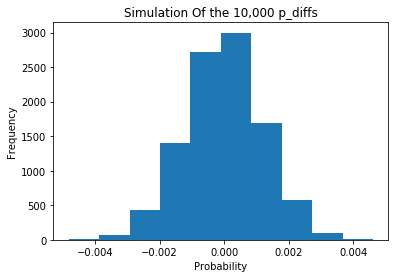

In [27]:
# Plotting a histogram of the p_diffs
p_diffs = np.array(p_diffs)
plt.hist(p_diffs)
plt.ylabel('Frequency')
plt.xlabel('Probability')
plt.title('Simulation Of the 10,000 p_diffs');

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

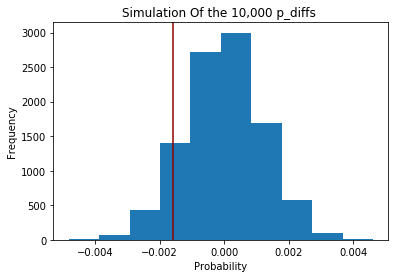

In [28]:
plt.hist(p_diffs)
plt.axvline(x=obs_diff, color= 'darkred') 
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('Simulation Of the 10,000 p_diffs ');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

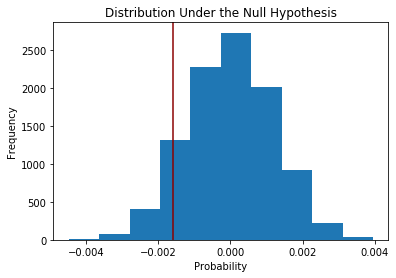

In [29]:
# The sampling distribution of the difference under the null hypothesis
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)
plt.hist(null_vals)
plt.axvline(x=obs_diff, color='darkred');
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('Distribution Under the Null Hypothesis');

In [30]:
# Calculating the p_value
((null_vals > obs_diff).mean())

0.9064

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

The value that was computed in known as the p-value. The p-value is dependent on what the alternative hypothesis is. This is the value that indicates the probability of observing a statistic if the null hypothesis is true. In the case of the alternative hypothesis, the more extreme. An exceptionally large p-value is indicative of not rejecting the null hypothesis. The calculated p-value of 0.9064 indicates that we should accept the null hypothesis and that the new page does not necessarily lead to more conversions. In statistics, a p-value of 0.05, is often the maximum value that is accepted when rejecting the null hypothesis. A p-value of 0.05 represents a 5% chance of making a type-1 error. Had we observed the red vertical line in the charts above being far more to the right, this would have meant a smaller shaded region and thus would have resulted in a smaller p-value. What this tells us is that we cannot say the new page is statistically any better when it comes to increasing the number of conversions.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the number of rows associated with the old page and new pages, respectively.

In [31]:
import statsmodels.api as sm
import scipy.stats as st

convert_old = df2.query('group == "control" and converted == 1').shape[0]
convert_new = df2.query('group == "treatment" and converted == 1').shape[0]
n_old = p_old
n_new = p_new
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [32]:
zscore, pvalue = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [33]:
zscore, pvalue

(1.3109241984234394, 0.9050583127590245)

The z-score tells us that the data falls within 1.31 standard deviations from the mean. We can be certain that around 95% of the data falls within two standard deviations of the mean. The z-score being less than two standard deviations coupled with the computed p-value being at around 0.9 which is nearly the same as when having done the bootstrapping method, this further indicates that we should not reject the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Linear regression is used when you have quantitative dependent otherwise known as response variables. Since conversion and no conversion are categorical response variables, a logistic regression approach is better suited for this dataset. 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [34]:
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
# The import from scipy is a workaround to prevent an error when running the code

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [35]:
# Creating the intercept column
# Creating the dummy variable column for which page('landing_page') each user receieved
df2['intercept'] = 1
df2[['ab_page', 'old_page']] = pd.get_dummies(df2['landing_page'])
df2.head()


,user_id,timestamp,group,landing_page,converted,intercept,ab_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [36]:
# Instantiating the regression model
logistic_model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results= logistic_model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 15 May 2020   Pseudo R-squ.:               8.077e-06
Time:                        10:35:08   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

* The p-value associated with the ab_page is 0.190 which is still above desired p-value of 0.05. The p-values above are indicative of using a two-tailed test, which is the case when using regression. This is testing to see if the parameters for the intercept and slope are equal to zero for the null hypothesis and not equal to zero for the alternative hypothesis. 

* The value differ from what is found in part two because a one-tailed test was used instead of a two-tailed test. 

In [37]:
left_tail = (p_diffs < obs_diff).mean() # Calculating the left side(lower) part of the tail
p_upper = p_diffs.mean() - obs_diff
right_tail = (p_diffs > p_upper).mean() # Calculationg the right side(upper) part of the tail
round(left_tail + right_tail, 4) # Adding both the right and left side to get the total area.


0.1897

A p-value of 0.1897 was calculated when adding the two areas above. This is fairly close to the p-value of 0.190 generated by the regression model. This is a good example of how one would could determine the p-value for when doing a two-tailed test and two see how the regression model also makes use of a two-tailed test.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

* Given this dataset, one could look at the 'timestamp' column and see if there are any correlations between the time of the day and or the day of the week when users are more likely to be converted. 
* A disadvantage to adding more terms into a regression model is what is termed multicollinearity. Multicollinearity results when you have independent variables that are correlated with one another. This can create challenges in determining each independent variable's relationship with the dependent variable. This results from the unstableness of the coefficient estimates and can therefore reduce any statistical power of the regression model.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [38]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,old_page
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0


In [39]:
# Determining which countries are in the dataset for creating the necessary number of dummy variables
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [40]:
# Create the necessary dummy variables
df_new[['UK', 'US', 'CA']] = pd.get_dummies(df_new['country'])

In [41]:
df_new['intercept'] = 1
logit_mod2 = sm.Logit(df_new['converted'], df_new[['intercept','UK', 'CA']])
results2 = logit_mod2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 15 May 2020   Pseudo R-squ.:               1.521e-05
Time:                        10:35:10   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9868      0.011   -174.174      0.000      -2.009      -1.964
UK            -0.0507      0.028     -1.786      0.074      -0.106       0.005
CA            -0.0099      0.013     -0.746      0.456      -0.036       0.016
==============================================================================
"""

When looking at the p-values, they are still above the cut-off p-value of 0.05. When factoring in the user's country, we still would not reject the null hypothesis. 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [42]:
# Creating the country/interaction columns
df_new['uk_ab_page'] = df_new['UK'] * df_new['ab_page']
df_new['ca_ab_page'] = df_new['CA'] * df_new['ab_page'] 

In [43]:
# Instantiating the model
logit_mod3 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK', 'CA', 'uk_ab_page', 'ca_ab_page']])
results3 = logit_mod3.fit()
results3.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Fri, 15 May 2020   Pseudo R-squ.:               3.482e-05
Time:                        10:35:12   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9922      0.016   -123.457      0.000      -2.024      -1.961
ab_page        0.0108      0.023      0.475      0.635      -0.034       0.056
UK            -0.0118      0.040     -0.296      0.767      -0.090       0.066
CA             0.0057      0.019      0.306      0.760      -0.031       0.043
uk_ab_page    -0.0783      0.057     -1.378      0.168      -0.190       0.033
ca_ab_page    -0.0314      0.027     -1.181      0.238      -0.084       0.021
==============================================================================
"""

In [44]:
# Using exponent values to interpret the results.
np.exp(results3.params)

intercept     0.136392
ab_page       1.010893
UK            0.988285
CA            1.005761
uk_ab_page    0.924703
ca_ab_page    0.969090
dtype: float64

In [45]:
1/_

intercept     7.331806
ab_page       0.989224
UK            1.011854
CA            0.994272
uk_ab_page    1.081428
ca_ab_page    1.031896
dtype: float64

### Results summary
* There were no p-values of 0.05 or less, therefore there is no indication of significance for any of the variables.
* There were no z-scores with an absolute value of > 1.5 standard deviations from the mean. With 95% of the data falling within two standard deviations from the mean, this provides further evidence to not reject the null hypothesis. 
* If a user was in the US, they were 1.01 more times likely to convert than if the user was in the UK holding all other variables constant.
* If a user was in the US, they were 1 times less likely to convert than if a user was in CA holding all other variables constant.
* If a user had received the old-page, there were 0.99 times less likely to convert than if they got the new page holding all other variables constant. 
* In combination with the high p-values, the z-scores, and other evidence this analysis provided, the old page probably does just as good if not maybe better than the new page. 
* In conclusion, the null hypothesis is not rejected. 


It is possible that we may get clearer correlations between the explanatory and response variable by examining some of the different variables provided with this dataset. One could try and determine if there are certain days of the week that may yield more conversions. Maybe certain hours of the day may yield more conversions. In the following two regression models the day of the week will be used as an explanatory variable to see if it has any correlation with conversion rates. The first one only concerning the days of the week, and the second one looking at the interaction between the days of the week and the ab_page.

In [46]:
# Convert timestamp from ojbect to timestamp data type
df_new['timestamp'] = pd.to_datetime(df_new['timestamp']) 

In [47]:
# Creating a 'weekday' name column
df_new['weekday'] = df_new['timestamp'].dt.day_name()
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,old_page,UK,US,CA,uk_ab_page,ca_ab_page,weekday
user_id,,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,1,0,0,0,Saturday
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,0,1,0,1,Monday
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,1,0,0,0,Monday
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,1,0,0,0,Sunday
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,1,0,0,0,Monday


In [48]:
# Create the weekday dummy variables
df_new[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']] = pd.get_dummies(df_new['weekday'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,old_page,UK,US,...,uk_ab_page,ca_ab_page,weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
user_id,,,,,,,,,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,1,...,0,0,Saturday,0,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,0,...,0,1,Monday,0,1,0,0,0,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,1,...,0,0,Monday,0,1,0,0,0,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,1,...,0,0,Sunday,0,0,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,1,...,0,0,Monday,0,1,0,0,0,0,0


In [49]:
# Instantiating the model
logit_mod4 = sm.Logit(df_new['converted'], df_new[['intercept', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', \
                                                   'Sunday']])
results4 = logit_mod4.fit()
results4.summary()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290577
Method:                           MLE   Df Model:                            6
Date:                Fri, 15 May 2020   Pseudo R-squ.:               2.601e-05
Time:                        10:35:15   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.4774
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0241      0.016   -129.362      0.000      -2.055      -1.993
Tuesday        0.0425      0.021      2.002      0.045       0.001       0.084
Wednesday      0.0395      0.022      1.799      0.072      -0.004       0.083
Thursday       0.0172      0.022      0.782      0.434      -0.026       0.060
Friday         0.0313      0.022      1.421      0.155      -0.012       0.075
Saturday       0.0273      0.021      1.294      0.196      -0.014       0.069
Sunday         0.0349      0.022      1.586      0.113      -0.008       0.078
==============================================================================
"""

In [50]:
np.exp(results4.params)

intercept    0.132107
Tuesday      1.043467
Wednesday    1.040293
Thursday     1.017360
Friday       1.031844
Saturday     1.027714
Sunday       1.035486
dtype: float64

In [51]:
1/_

intercept    7.569637
Tuesday      0.958344
Wednesday    0.961267
Thursday     0.982937
Friday       0.969138
Saturday     0.973033
Sunday       0.965730
dtype: float64

* When factoring the days of the week, it is intriguing to see that there is a p-value of 0.045 indicating statistical significance in relationship to the weekday of Tuesday. 
* When comparing the exponentiation values to Monday, the conversion rate is 0.9583 times less on Tuesday compared to Monday when holding all other variables constant. 
* All other days of the week have conversion rates that are even less when compared to Monday when holding all other variables constant.
* Despite Tuesday having a p-value of 0.045, the differences are so small that when factoring days of the week, it would not be practical to reject the null hypothesis. Based on this model, the null hypothesis should not be rejected. 

In [52]:
# Creating weekday/ab_page interaction columns
df_new['tue_ab_page'] = df_new['Tuesday'] * df_new['ab_page']
df_new['wed_ab_page'] = df_new['Wednesday'] * df_new['ab_page']
df_new['thu_ab_page'] = df_new['Thursday'] * df_new['ab_page']
df_new['fri_ab_page'] = df_new['Friday'] * df_new['ab_page']
df_new['sat_ab_page'] = df_new['Saturday'] * df_new['ab_page']
df_new['sun_ab_page'] = df_new['Sunday'] * df_new['ab_page']
df_new.head()
 

,country,timestamp,group,landing_page,converted,intercept,ab_page,old_page,UK,US,...,Thursday,Friday,Saturday,Sunday,tue_ab_page,wed_ab_page,thu_ab_page,fri_ab_page,sat_ab_page,sun_ab_page
user_id,,,,,,,,,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [53]:
# Instantiating the weekday/ab_page interaction model
logit_mod5 = sm.Logit(df_new['converted'], df_new[['intercept', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', \
                                                  'Sunday', 'tue_ab_page', 'wed_ab_page', 'thu_ab_page', 'fri_ab_page', \
                                                  'sat_ab_page', 'sun_ab_page']])
results5 = logit_mod5.fit()
results5.summary()

Optimization terminated successfully.
         Current function value: 0.366091
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290571
Method:                           MLE   Df Model:                           12
Date:                Fri, 15 May 2020   Pseudo R-squ.:               8.399e-05
Time:                        10:35:18   Log-Likelihood:            -1.0638e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1197
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -2.0241      0.016   -129.362      0.000      -2.055      -1.993
Tuesday         0.0579      0.026      2.268      0.023       0.008       0.108
Wednesday       0.0743      0.027      2.796      0.005       0.022       0.126
Thursday        0.0271      0.027      1.011      0.312      -0.025       0.080
Friday          0.0480      0.027      1.784      0.074      -0.005       0.101
Saturday        0.0006      0.026      0.022      0.983      -0.050       0.051
Sunday          0.0490      0.027      1.828      0.068      -0.004       0.102
tue_ab_page    -0.0310      0.029     -1.079      0.280      -0.087       0.025
wed_ab_page    -0.0707      0.031     -2.294      0.022      -0.131      -0.010
thu_ab_page    -0.0200      0.031     -0.645      0.519      -0.081       0.041
fri_ab_page    -0.0333      0.031     -1.073      0.283      -0.094       0.028
sat_ab_page     0.0531      0.028      1.871      0.061      -0.003       0.109
sun_ab_page    -0.0283      0.031     -0.916      0.359      -0.089       0.032
===============================================================================
"""

In [54]:
np.exp(results5.params)

intercept      0.132107
Tuesday        1.059636
Wednesday      1.077094
Thursday       1.027514
Friday         1.049156
Saturday       1.000551
Sunday         1.050199
tue_ab_page    0.969440
wed_ab_page    0.931730
thu_ab_page    0.980220
fri_ab_page    0.967204
sat_ab_page    1.054565
sun_ab_page    0.972077
dtype: float64

In [55]:
1/_

intercept      7.569637
Tuesday        0.943721
Wednesday      0.928424
Thursday       0.973223
Friday         0.953147
Saturday       0.999450
Sunday         0.952201
tue_ab_page    1.031523
wed_ab_page    1.073273
thu_ab_page    1.020179
fri_ab_page    1.033908
sat_ab_page    0.948258
sun_ab_page    1.028726
dtype: float64

When running this model, there are three p-values that indicate statistical significance
1. Tuesday: p-value = 0.023
2. Wednesday: p-value = 0.005
3. we_ab_page: p-value = 0.022

* we could conclude that there is a significant correlation to converting if a user gets a new page and it happens to be on a Wednesday. 
* This would more than likely not be practical to assume the new page might have some advantage given it is a Wednesday unless we could conclude that when compared to certain days of the week there were several more times more people converting if directed to the new page on a Wednesday. The exponentiation values above suggest too small of differences to even consider the weekday and or interaction with the weekday and ab_page. 


<a id='conclusions'></a>
## Conclusions

 

When factoring all the variables including the country, weekday, and the interactions with the ab_page, the old page probably does just as good as the new page if not maybe even a little better. In conclusion the null hypothesis is accepted.

### Resources
* https://stackoverflow.com/questions/52456874/drop-rows-on-multiple-conditions-in-pandas-dataframe
* https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/
* https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/
